# Lead Scoring - Case Study

#### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals of Case Study



Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Importing Libraries and Data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

In [4]:
df=pd.read_csv('Leads.csv')

## Inspecting the Dataframe

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Exploratory Data Analysis

### Data Cleaning

#### Identifying Missing Values

In [10]:
#dropping Lead Number and Prospect ID since they have all unique value
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

##### As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [11]:
#Replacing 'Select' values with Nan
df=df.replace("Select", np.nan)

In [12]:
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

### Dropping Columns with Missing Values >=35%

In [13]:
null_35=df.columns[100*df.isnull().mean()>35]

In [14]:
null_35

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
df=df.drop(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],axis=1)

In [16]:
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [17]:
df.shape

(9240, 25)

### Categorical Attributes Analysis:

##### Imbalanced Variables

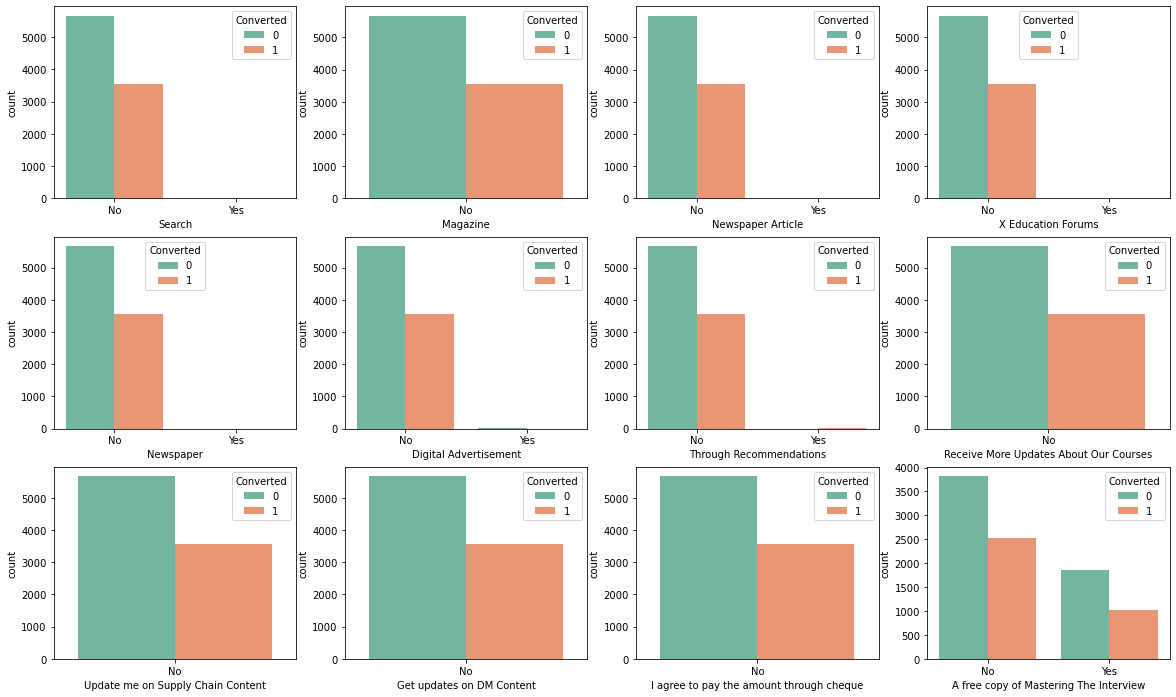

In [18]:
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df, ax = axs[2,3],palette = 'Set2')
plt.show()

##### Inference

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [19]:
df=df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [21]:
df['Lead Source'].isnull().sum()

36

##### Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [22]:
#replacing Nan Value with Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [23]:
df['Lead Source'].isnull().sum()

0

In [24]:
#combining low frequency values to Others

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

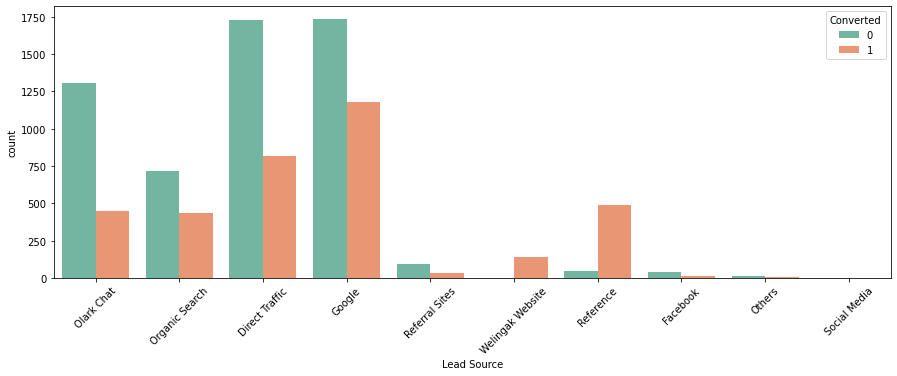

In [25]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x= 'Lead Source', hue='Converted' , data =df , palette = 'Set2')
plt.xticks(rotation=45) 
plt.show()


##### Inference

Maximum Leads are generated by Google and Direct Traffic.

Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [26]:
#checking value counts of Country column

df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
#checking value counts of Country column

df['Country'].isnull().sum()

2461

##### Since, missing values are very high , we can impute all missing values with value 'not provided'

In [28]:
#Imputing missing values in Country column with "'not provided"
df['Country'] = df['Country'].replace(np.nan,'not provided')

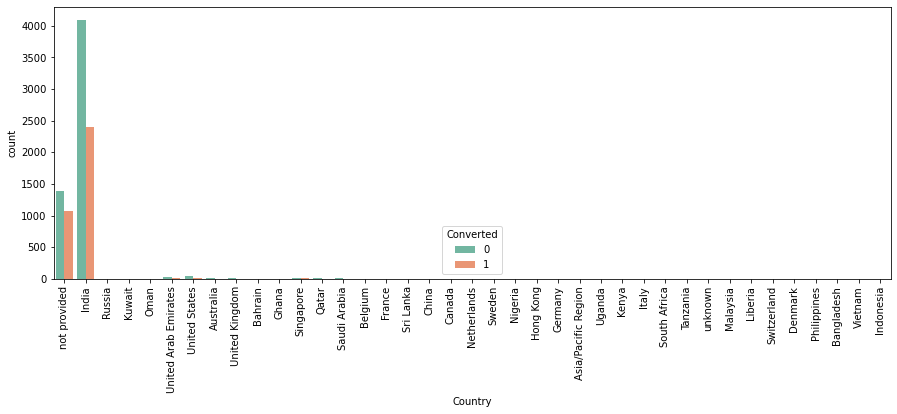

In [29]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
sns.countplot(x= 'Country', hue='Converted' , data =df , palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

#### Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.

Hence, we can drop this column

In [30]:
df=df.drop(['Country'],axis=1)

In [31]:
#checking value counts of 'What is your current occupation' column
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided'

In [32]:
#Creating new category 'Not provided'

df['What is your current occupation'] =df['What is your current occupation'].replace(np.nan, 'Not provided')

In [33]:
#checking value counts of 'What is your current occupation' column again
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

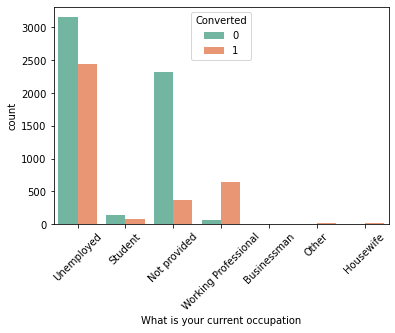

In [34]:
#visualizing count of Variable based on Converted value

sns.countplot(x='What is your current occupation', hue='Converted' , data = df , palette = 'Set2')
plt.xticks(rotation=45)
plt.show()

##### Inference

Maximum leads generated are unemployed and their conversion rate is more than 50%.

Conversion rate of working professionals is very high.

In [35]:

#checking value counts of 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

In [36]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [37]:

#checking value counts of 'What matters most to you in choosing a course' again

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

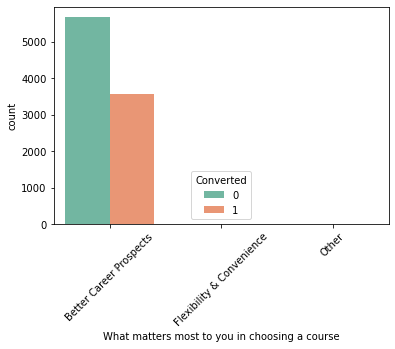

In [38]:
#visualizing count of Variable based on Converted value

sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df , palette = 'Set2')
plt.xticks(rotation=45)
plt.show()

##### Inference
This column spread of variance is very low , hence it can be dropped.

In [39]:
df=df.drop(['What matters most to you in choosing a course'],axis=1)

In [40]:
#cheecking the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Last Activity                    9137 non-null   object 
 9   What is your current occupation  9240 non-null   object 
 10  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [41]:
#checking value counts of Last Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### Missing values can be imputed with mode value "Email Opened"

In [42]:
  #replacing Nan Values with mode value "Email Opened"

df['Last Activity'] =df['Last Activity'].replace(np.nan,'Email Opened')

In [43]:
#checking value counts of Last Activity again
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
#combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

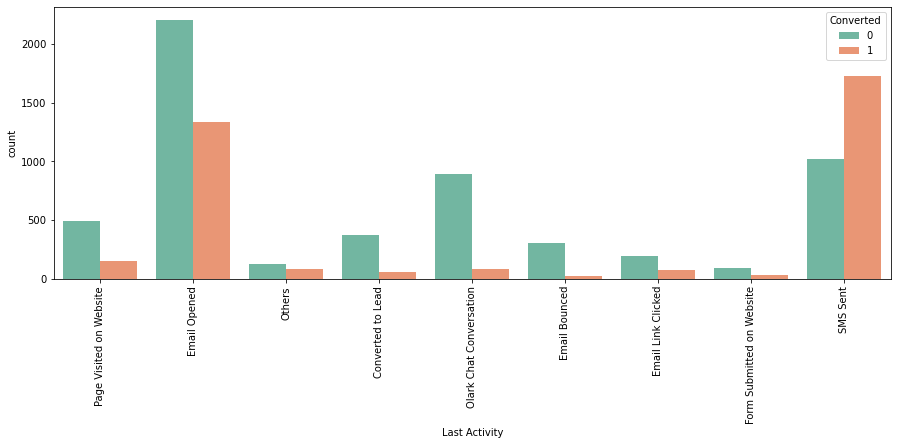

In [45]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x= 'Last Activity', hue='Converted' , data = df , palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

##### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good. 

SMS sent as last acitivity has high conversion rate.

In [46]:
# dropping  it  as it is a X-education's sales team generated data
df=df.drop(['Last Activity'],axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   What is your current occupation  9240 non-null   object 
 9   Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [48]:
#Check the Null Values in All Columns after imputation:
100*df.isnull().mean()

Lead Origin                        0.000000
Lead Source                        0.000000
Do Not Email                       0.000000
Do Not Call                        0.000000
Converted                          0.000000
TotalVisits                        1.482684
Total Time Spent on Website        0.000000
Page Views Per Visit               1.482684
What is your current occupation    0.000000
Last Notable Activity              0.000000
dtype: float64

In [49]:
totalvisits_median=df['TotalVisits'].median()

In [50]:
df['TotalVisits']=df['TotalVisits'].fillna(totalvisits_median)

In [51]:
#Check the Null Values in All Columns after imputation:
100*df.isnull().mean()

Lead Origin                        0.000000
Lead Source                        0.000000
Do Not Email                       0.000000
Do Not Call                        0.000000
Converted                          0.000000
TotalVisits                        0.000000
Total Time Spent on Website        0.000000
Page Views Per Visit               1.482684
What is your current occupation    0.000000
Last Notable Activity              0.000000
dtype: float64

In [52]:
pagesviewpervisit_median=df['Page Views Per Visit'].median()

In [53]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(pagesviewpervisit_median)

In [54]:
#Check the Null Values in All Columns after imputation:
100*df.isnull().mean()

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Do Not Call                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

In [55]:
df.shape

(9240, 10)

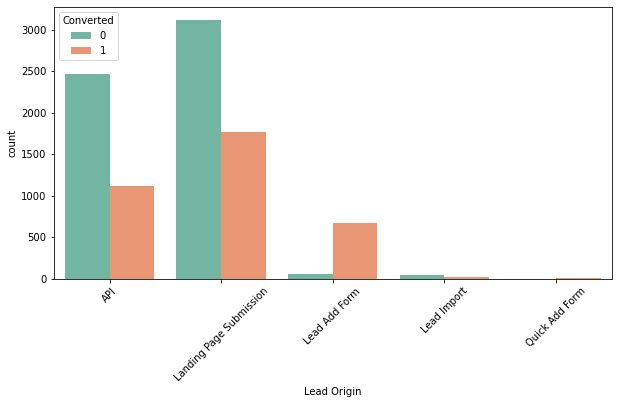

In [56]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(10,5))
sns.countplot(x= 'Lead Origin', hue='Converted' , data = df , palette = 'Set2')
plt.xticks(rotation=45)
plt.show()

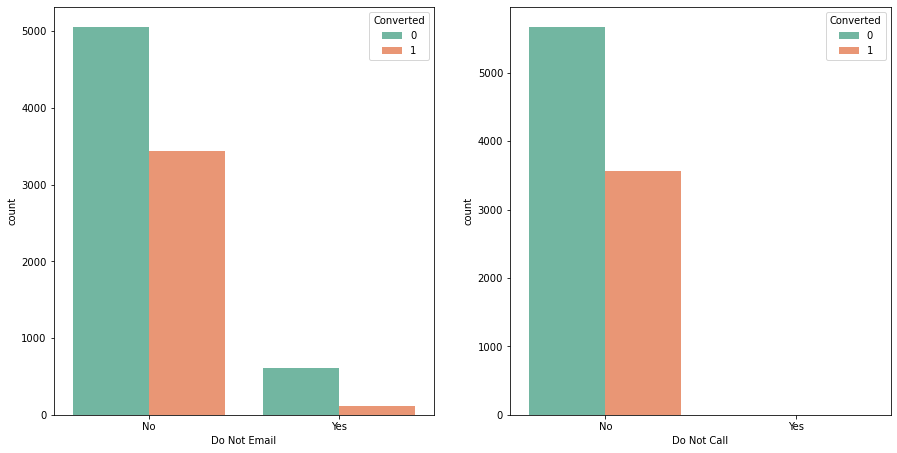

In [57]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1],palette = 'Set2')
plt.show()

#### We Can drop the Do Not Call Column as the data is highly skewed

In [58]:
df=df.drop(['Do Not Call'],axis=1)

In [59]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [60]:
#clubbing lower frequency values

df['Last Notable Activity'] =df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

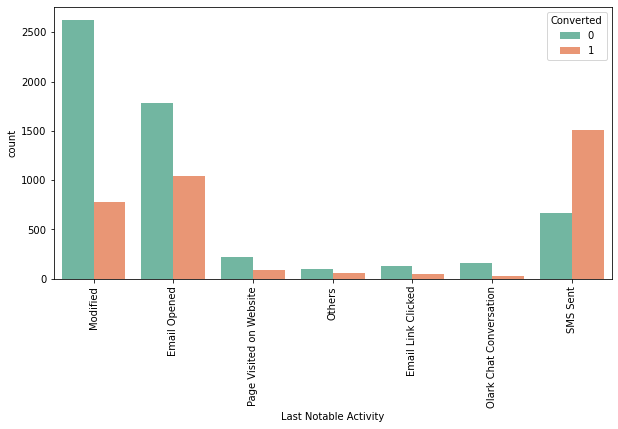

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='Last Notable Activity',hue='Converted',data=df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

###### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [62]:
# Dropping 'Last Notable Activity' as this is a sales team generated data
df=df.drop(['Last Notable Activity'],axis=1)

In [63]:
#checking info of dataset for remaining columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


In [64]:
#checking dataset
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


#### Numerical Attributes Analysis:

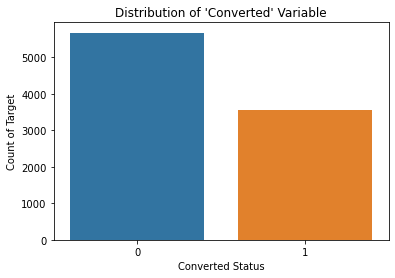

In [65]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [66]:
# Finding out conversion rate
converted=100*df['Converted'].mean()
converted

38.53896103896104

### Currently, lead Conversion rate is 38% only

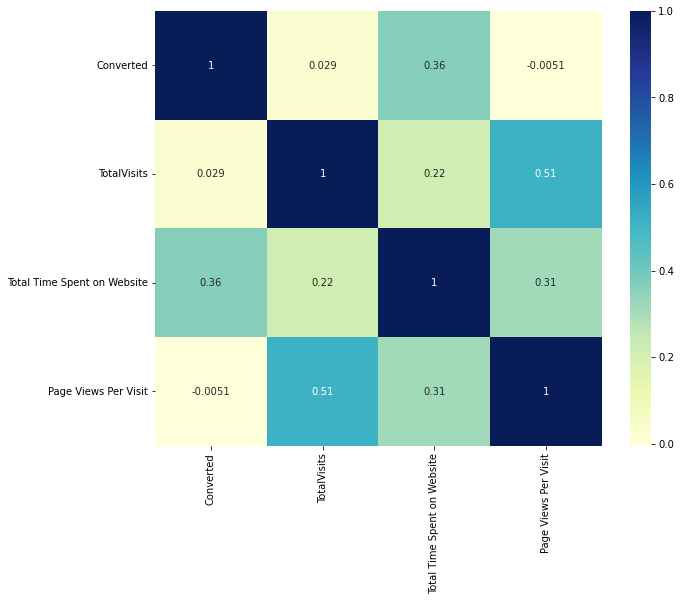

In [67]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

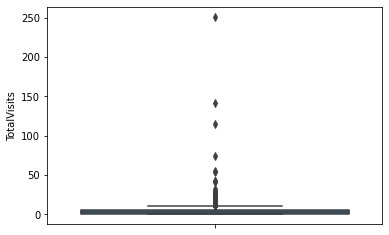

In [68]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df['TotalVisits'])
plt.show()


#### Presence of outliers can be seen clearly

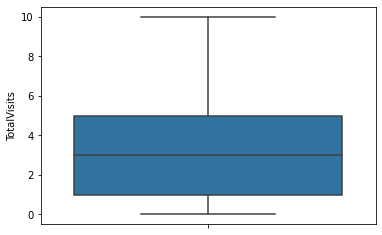

In [69]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['TotalVisits'])
plt.show()

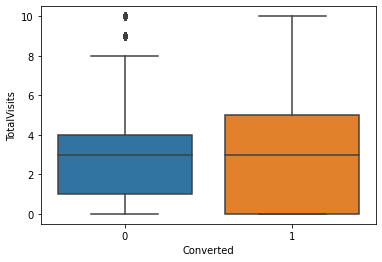

In [70]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

#### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

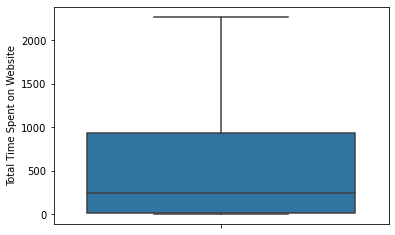

In [71]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = df['Total Time Spent on Website'])
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

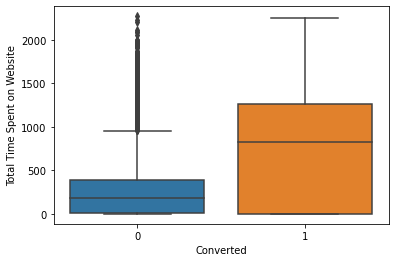

In [72]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()


#### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

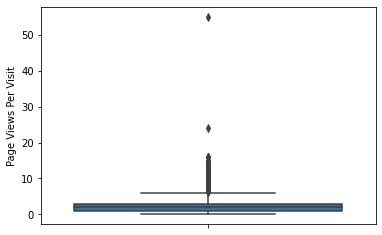

In [73]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =df['Page Views Per Visit'])
plt.show()

##### Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

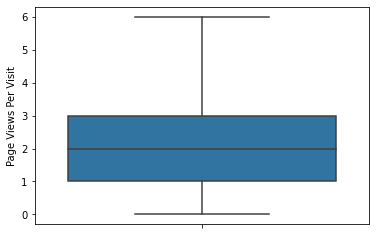

In [74]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

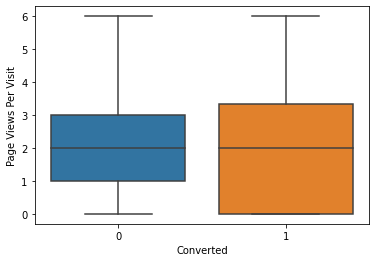

In [75]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

#### Inference

Median for converted and not converted leads is almost same.

Nothing conclusive can be said on the basis of Page Views Per Visit.

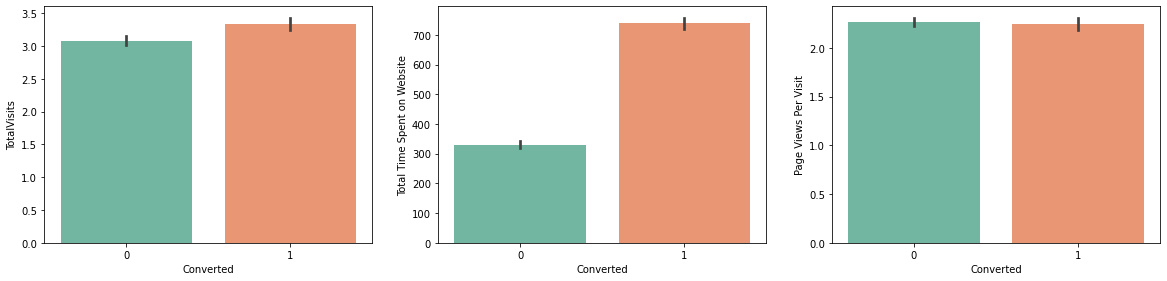

In [76]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)
plt.show()

#### Inference

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

#### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation


## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [77]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [78]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   int64  
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 577.6+ KB


#### Dummy Variable Creation:

In [80]:
#getting a list of categorical columns foy creating dummy

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [81]:
dum_cols=['Lead Origin', 'Lead Source', 'What is your current occupation']
dum=pd.get_dummies(df[dum_cols],drop_first=True)


In [82]:
df=pd.concat([dum,df],axis=1)

In [83]:
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [84]:
df.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'],axis=1,inplace=True)

In [85]:
df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.0,1532,2.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,305,1.0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,1428,1.0


###### Test-Train Split

In [86]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variable to X
X=df.drop('Converted', axis=1)

#checking head of X
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,1532,2.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,305,1.0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,1428,1.0


In [88]:
# Putting response variable to y
y = df['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [90]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler


In [91]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1871,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.291638,-1.149699,-0.885371,-1.266675
6795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.291638,0.299722,0.005716,-0.516439
3516,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.291638,0.662077,-0.691418,0.143543
8105,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.291638,0.662077,1.365219,1.553761
3934,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.291638,-1.149699,-0.885371,-1.266675


In [92]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

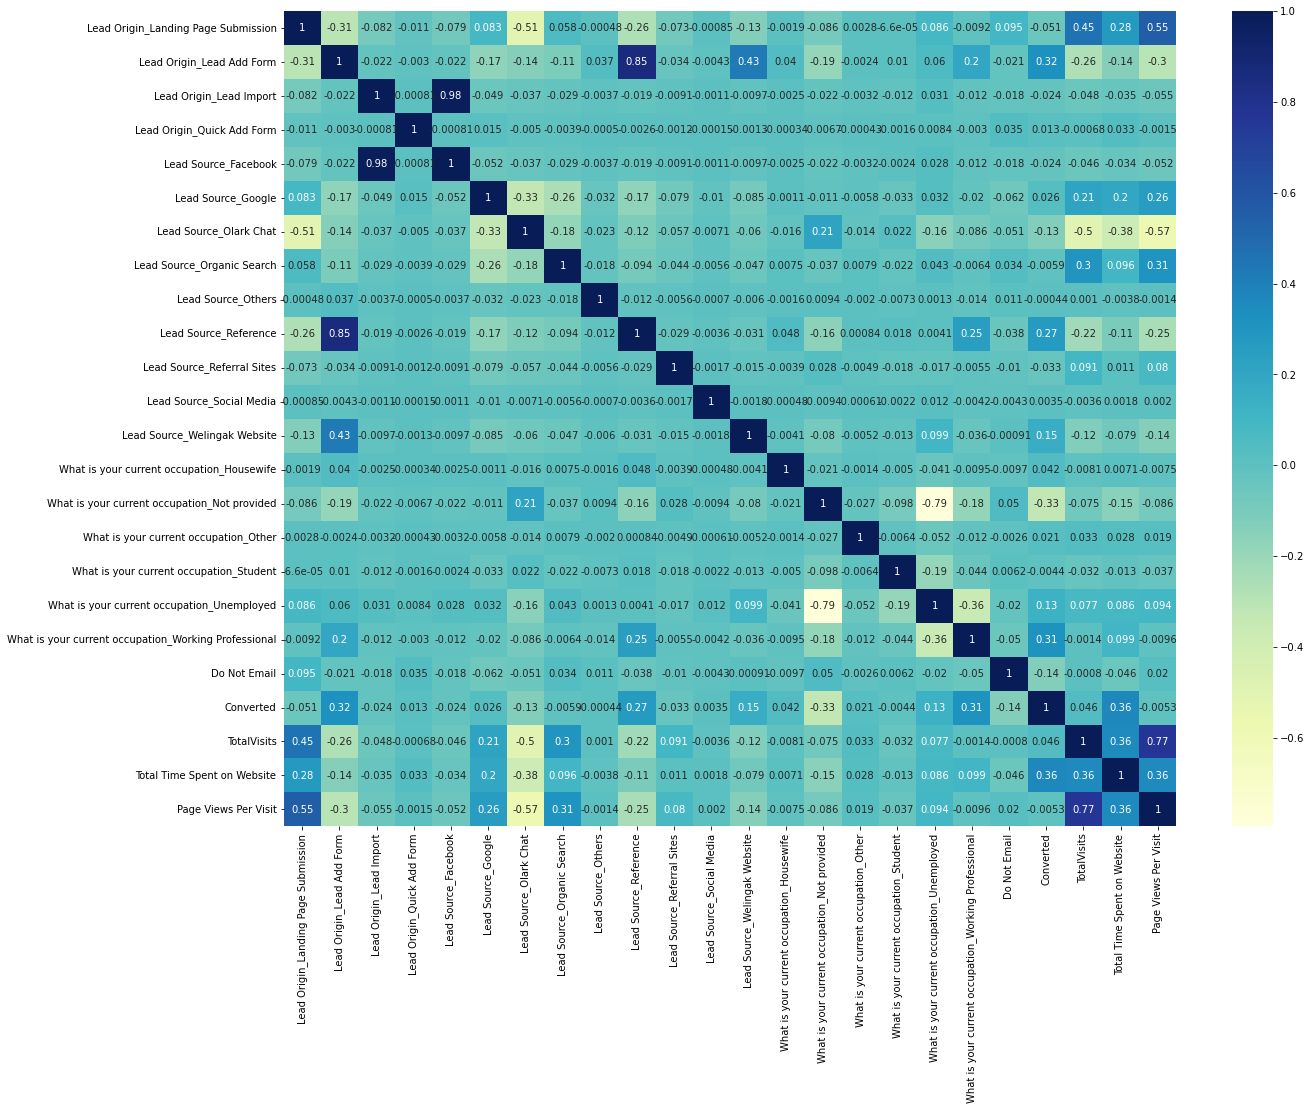

In [93]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")
plt.show()


##### Dropping highly correlated dummy variables



In [94]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form','What is your current occupation_Not provided'],axis=1)

In [95]:
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form','What is your current occupation_Not provided'],axis=1)

##### Model Building using Stats Model & RFE

In [96]:
# importing necessary library
import statsmodels.api as sm

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4)]

In [102]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Lead Source_Organic Search',
       'Lead Source_Social Media', 'TotalVisits', 'Page Views Per Visit'],
      dtype='object')

##### Model 1

In [105]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.0
Date:                Sun, 04 Jun 2023   Deviance:                       5824.0
Time:                        13:12:18   Pearson chi2:                 7.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3488
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [106]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)


##### Model 2

In [107]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.1
Date:                Sun, 04 Jun 2023   Deviance:                       5844.2
Time:                        13:15:32   Pearson chi2:                 7.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### p-value of variable "Lead Source_Facebook " is high, so we will drop it.

In [109]:
#dropping column with high p-value

col = col.drop('Lead Source_Facebook')

##### Model 3

In [110]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.3
Date:                Sun, 04 Jun 2023   Deviance:                       5844.7
Time:                        13:19:02   Pearson chi2:                 7.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3467
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### variable 'What is your current occupation_Other' has high p-value, so it needs to be dropped

In [111]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other')

##### Model 4

In [112]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.6
Date:                Sun, 04 Jun 2023   Deviance:                       5845.3
Time:                        13:22:37   Pearson chi2:                 7.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### variable 'Lead Source_Referral Sites' has high p-value, so it needs to be dropped

In [113]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites')

##### Model 5

In [114]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.3
Date:                Sun, 04 Jun 2023   Deviance:                       5846.6
Time:                        13:26:05   Pearson chi2:                 7.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3465
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1296      0.107    -19.884      0.000      -2.340      -1.920
Lead Origin_Landing Page Submission                     -0.1360      0.085     -1.604      0.109      -0.302       0.030
Lead Source_Google                                       0.3154      0.077      4.088      0.000       0.164       0.467
Lead Source_Olark Chat                                   0.9670      0.120      8.054      0.000       0.732       1.202
Lead Source_Others                                       1.3912      0.548      2.540      0.011       0.318       2.465
Lead Source_Reference                                    3.5562      0.213     16.731      0.000       3.140       3.973
Lead Source_Welingak Website                             5.5563      0.726      7.656      0.000       4.134       6.979
What is your current occupation_Student                  1.1218      0.220      5.097      0.000       0.690       1.553
What is your current occupation_Unemployed               1.2543      0.081     15.462      0.000       1.095       1.413
What is your current occupation_Working Professional     3.7753      0.191     19.816      0.000       3.402       4.149
Do Not Email                                            -0.3213      0.042     -7.638      0.000      -0.404      -0.239
Total Time Spent on Website                              1.0714      0.038     28.495      0.000       0.998       1.145
========================================================================================================================
"""

##### variable 'Lead Origin_Landing Page Submission ' has high p-value, so it needs to be dropped

In [115]:
#dropping column with high p-value

col = col.drop('Lead Origin_Landing Page Submission')

##### Model 6

In [116]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.6
Date:                Sun, 04 Jun 2023   Deviance:                       5849.1
Time:                        13:29:00   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3463
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2337      0.086    -26.054      0.000      -2.402      -2.066
Lead Source_Google                                       0.3452      0.075      4.609      0.000       0.198       0.492
Lead Source_Olark Chat                                   1.0738      0.100     10.697      0.000       0.877       1.271
Lead Source_Others                                       1.4156      0.548      2.585      0.010       0.342       2.489
Lead Source_Reference                                    3.6656      0.202     18.190      0.000       3.271       4.061
Lead Source_Welingak Website                             5.6661      0.723      7.842      0.000       4.250       7.082
What is your current occupation_Student                  1.1126      0.220      5.059      0.000       0.682       1.544
What is your current occupation_Unemployed               1.2474      0.081     15.406      0.000       1.089       1.406
What is your current occupation_Working Professional     3.7599      0.190     19.775      0.000       3.387       4.133
Do Not Email                                            -0.3228      0.042     -7.680      0.000      -0.405      -0.240
Total Time Spent on Website                              1.0690      0.038     28.471      0.000       0.995       1.143
========================================================================================================================
"""

#### Since the Model 6 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

#### Calculating VIF

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,1.60
0,Lead Source_Google,1.40
1,Lead Source_Olark Chat,1.30
3,Lead Source_Reference,1.24
9,Total Time Spent on Website,1.24
7,What is your current occupation_Working Profes...,1.19
4,Lead Source_Welingak Website,1.05
5,What is your current occupation_Student,1.02
8,Do Not Email,1.01
2,Lead Source_Others,1.00


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Predicting a Train model

In [118]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.317605
6795    0.291921
3516    0.364134
8105    0.713506
3934    0.317605
4844    0.973705
3297    0.158106
8071    0.993349
987     0.183633
7423    0.826902
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31760481, 0.29192068, 0.3641343 , 0.71350645, 0.31760481,
       0.97370468, 0.15810609, 0.99334949, 0.18363301, 0.82690151])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.317605,1871
1,0,0.291921,6795
2,0,0.364134,3516
3,0,0.713506,8105
4,0,0.317605,3934


In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.317605,1871,0
1,0,0.291921,6795,0
2,0,0.364134,3516,0
3,0,0.713506,8105,1
4,0,0.317605,3934,0


#### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [122]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3588  414]
 [ 891 1575]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7982374768089053


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6386861313868614

In [126]:
# Let us calculate specificity
TN / float(TN+FP)


0.896551724137931

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10344827586206896


In [128]:
# positive predictive value 
print (TP / float(TP+FP))


0.7918552036199095


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8010716677829873


##### PLOTTING ROC CURVE

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


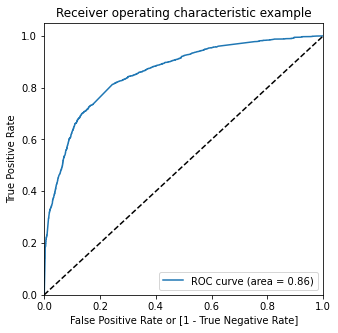

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.317605,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.291921,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.364134,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.713506,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.317605,3934,0,1,1,1,1,0,0,0,0,0,0


In [136]:
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
      cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1
    
      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.514069  0.981346  0.226137
0.2   0.2  0.687075  0.899027  0.556472
0.3   0.3  0.770717  0.820762  0.739880
0.4   0.4  0.801948  0.697891  0.866067
0.5   0.5  0.798237  0.638686  0.896552
0.6   0.6  0.784477  0.566099  0.919040
0.7   0.7  0.764533  0.476886  0.941779
0.8   0.8  0.739177  0.364964  0.969765
0.9   0.9  0.694496  0.208840  0.993753


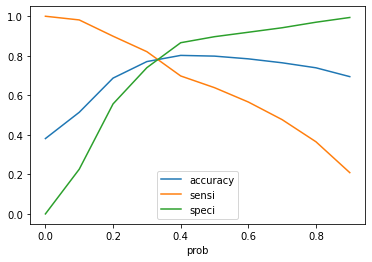

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [138]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.317605,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.291921,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.364134,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.713506,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.317605,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.317605,1871,1,32
1,0,0.291921,6795,0,29
2,0,0.364134,3516,1,36
3,0,0.713506,8105,1,71
4,0,0.317605,3934,1,32


In [140]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2024
0     442
Name: final_Predicted, dtype: int64

In [141]:
# check the precentage of final_predicted conversions

2024/float(2024+442)

0.8207623682076237

#### Hence, we can see that the final prediction of conversions have a target of 82% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.770717377860235

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2961, 1041],
       [ 442, 2024]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8207623682076237

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.739880059970015

#### Inference:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:


Accuracy : 77.07%

Sensitivity :82.07%

Specificity : 73.99%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [147]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.260119940029985


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6603588907014681


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8701146047605054


###### Precision and Recall

In [150]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2961, 1041],
       [ 442, 2024]], dtype=int64)

In [151]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6603588907014681

In [152]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8207623682076237

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6603588907014681

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8207623682076237

##### Precision and Recall Trade-off

In [156]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [157]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

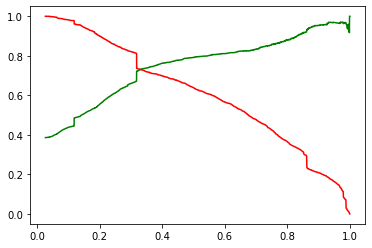

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [159]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()


,Lead Origin_Landing Page Submission,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.298654,1.738658,0.933036,2.074447
2376,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.298654,-1.155538,-0.900812,-1.269139
7766,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.298654,0.653334,-0.793792,1.517182
9199,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-0.298654,-1.155538,-0.900812,-1.269139
4359,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.298654,-1.155538,-0.900812,-1.269139


In [160]:
X_test = X_test[col]
X_test.head()

,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Total Time Spent on Website
4269,0,0,0,0,0,0,0,0,-0.298654,0.933036
2376,0,0,0,1,0,0,1,0,-0.298654,-0.900812
7766,1,0,0,0,0,0,0,1,-0.298654,-0.793792
9199,0,1,0,0,0,0,1,0,-0.298654,-0.900812
4359,0,0,0,1,0,0,1,0,-0.298654,-0.900812


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
X_test_sm.shape

(2772, 11)

In [163]:
y_test_pred = res.predict(X_test_sm)   

In [164]:
y_test_pred[:10]

4269    0.242335
2376    0.859688
7766    0.753840
9199    0.314526
4359    0.859688
9186    0.420445
1631    0.612211
8963    0.271311
8007    0.110265
5324    0.231938
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Let's see the head
y_pred_1.head()

,0
4269,0.242335
2376,0.859688
7766,0.753840
9199,0.314526
4359,0.859688


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.242335
1,1,2376,0.859688
2,1,7766,0.753840
3,0,9199,0.314526
4,1,4359,0.859688


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [173]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.242335
1,1,2376,0.859688
2,1,7766,0.753840
3,0,9199,0.314526
4,1,4359,0.859688


#### Assigning Lead Score

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.242335,24
1,2376,1,0.859688,86
2,7766,1,0.753840,75
3,9199,0,0.314526,31
4,4359,1,0.859688,86


In [176]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [177]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.242335,24,0
1,2376,1,0.859688,86,1
2,7766,1,0.753840,75,1
3,9199,0,0.314526,31,1
4,4359,1,0.859688,86,1


In [178]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    908
0    187
Name: final_Predicted, dtype: int64

In [179]:
# check the precentage of final_predicted conversions on test data

908/float(908+187)

0.8292237442922374

##### Hence we can see that the final prediction of conversions have a target rate of 82% (same as predictions made on training data set)

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [180]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7734487734487735

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1236,  441],
       [ 187,  908]], dtype=int64)

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [183]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292237442922374

In [184]:
# Let us calculate specificity
TN / float(TN+FP)

0.7370304114490162

#### Precision and Recall metrics for the test set

In [185]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6730911786508524

In [186]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8292237442922374

###### features and their coefficicent from final model

In [198]:
logm6_results = logm6.fit()

In [199]:
parameters = logm6_results.params


In [200]:
sorted_parameters = parameters.sort_values(ascending=False)


In [201]:
sorted_parameters

Lead Source_Welingak Website                            5.666090
What is your current occupation_Working Professional    3.759867
Lead Source_Reference                                   3.665592
Lead Source_Others                                      1.415608
What is your current occupation_Unemployed              1.247420
What is your current occupation_Student                 1.112550
Lead Source_Olark Chat                                  1.073847
Total Time Spent on Website                             1.069002
Lead Source_Google                                      0.345238
Do Not Email                                           -0.322800
const                                                  -2.233746
dtype: float64

#### Inference:

After running the model on the Test Data these are the figures we obtain:

Accuracy : 77.34%

Sensitivity :82.92%

Specificity : 73.70%


#### Conclusion:

While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.

Accuracy, Sensitivity and Specificity values of test set are around 77%, 82% and 73% which are approximately closer to the respective values calculated using trained set.

Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence overall this model seems to be good.

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

Lead Source_Welingak Website : 5.66

What is your current occupation_Working Professional : 3.75

Lead Source_Reference : 3.66